# Something to try some models out

In [1]:
def moneycalc(confusion_matrix):
    '''
    This function takes a confusion matrix and calculates the cost of the sent mail
    then it substracts it from the estimated revenue of the customers.
    Cost of mail: 68 cents
    Average donation: 15.62 $
    '''
    # Cost = 68 cents times all positive predicted, we will send the mail there
    cost = 0.68 * (confusion_matrix[0][1]+confusion_matrix[1][1])
    # Revenue = 15.62 * True positives
    rev = 15.62 * confusion_matrix[1][1]
    return rev-cost

In [2]:
def model_test(X_train,X_test,y_train,y_test):
    # Creating a list of different models
    modellist = [LogisticRegression(random_state=0, solver='sag'),
                 DecisionTreeClassifier(max_depth=2),
                 neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance'),
                 RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2,
                             n_jobs = -1)  ]
    modelnames = ['Logistic Regression','DecisionTree','KNN','RandomForest']
    #Evaluating each model
    for i in range(len(modellist)):
        model = modellist[i]
        # Fitting
        model.fit(X_train, y_train)
        # Predicting
        predictions = model.predict(X_test)
        # Calculating confusion matrix
        cm = confusion_matrix(y_test, predictions)
        print(cm)
        # Calculating profit if this prediction would have been apllied
        print('Profit: '+str(moneycalc(cm))+ ' $')
        # Printing different evaluation metrics
        print(modelnames[i] + " score: ", model.score(X_test, y_test))
        print(modelnames[i] + "precision: ",precision_score(y_test,predictions))
        print(modelnames[i] + "recall: ",recall_score(y_test,predictions))
        print(modelnames[i] + "f1: ",f1_score(y_test,predictions))

# Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

# Reading the files

In [5]:
numerical = pd.read_csv('files_for_lab/numerical.csv')
categorical = pd.read_csv('files_for_lab/categorical.csv')
target = pd.read_csv('files_for_lab/target.csv')

In [6]:
numerical.head(4)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,WEALTH2,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,CARDPROM,NUMPROM,CARDPM12,NUMPRM12,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,2,1,5,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,74,88,8,0,4,96,77,19,13,31,5,14,14,31,54,46,0,0,90,0,10,0,0,0,33,65,40,99,99,6,2,10,7,27,74,6,14,240.0,31,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,2,1,9,3611,940,998,99,0,0,50,50,67,0,0,31,6,4,2,6,4,14,0,0,2,0,1,4,34,41,43,32,42,45,32,33,46,21,13,14,33,23,10,4,2,11,16,36,22,15,12,1,5,4,21,75,55,23,9,69,4,3,24,317,360,99,99,0,0,0,0,0,0,0,5468,5218,12,10,96,4,97,3,9,59,94,88,55,95,5,4,1,3,5,4,2,18,44,5,0,0,0,97,98,98,98,99,94,0,83,76,73,21,5,0,0,0,4,0,0,0,91,91,91,94,4480.0,13.0,803.0,1088,1096,1026,1037,36175,2,6,2,5,15,14,13,10,33,2,5,2,5,15,14,14,10,32,6,2,66,3,56,44,9,80,14,0,0,0,0,0,0,6,0,2,24,32,12,71,70,83,58,81,57,64,57,99,99,0,22,24,4,21,13,2,1,6,0,4,1,0,3,1,0,6,13,1,2,8,18,11,4,3,4,10,7,11,1,6,2,1,16,69,5,2,160,5,5,12,21,7,30,20,14,24,4,24,10,0,0,0,8,15,0,55,10,11,0,0,2,0,3,1,1,2,3,1,1,0,3,0,0,0,42,39,50,7,27,16,99,92,53,5,10,2,26,56,97,99,0,0,0,96,0,4,0,0,0,99,0,99,99,99,20,4,6,5,12,32,6,13,47.0,3,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,8,1,1,7001,2040,2669,0,2,98,49,51,96,2,0,0,2,0,0,0,0,0,0,0,2,0,0,0,35,43,46,37,45,49,23,35,40,25,13,20,19,16,13,10,8,15,14,30,22,19,25,10,23,21,35,44,22,6,2,63,9,9,19,183,254,69,69,1,6,5,3,3,3,0,497,546,2,1,78,22,93,7,18,36,76,65,30,86,14,7,2,5,11,17,3,17,60,18,0,1,0,0,1,6,18,50,0,4,36,49,51,14,5,4,2,24,11,2,3,6,0,2,9,44,0.0,281.0,518.0,251,292,292,340,11576,32,18,20,15,12,2,0,0,1,20,19,24,18,16,2,0,0,1,28,8,31,11,38,62,8,74,22,0,0,0,0,0,2,2,1,21,19,24,6,61,65,73,59,70,56,78,62,82,99,4,10,5,2,6,12,0,1,9,5,18,20,5,7,6,0,11,33,4,3,2,12,3,3

In [7]:
categorical.head(4)

,STATE,CLUSTER,HOMEOWNR,GENDER,DATASRCE,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A,DOMAIN_B,ODATEW_YR,ODATEW_MM,DOB_YR,DOB_MM,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM
0,IL,36,H,F,3,L,E,C,T,2,89,1,37,12,92,8,94,2,95,12,89,11
1,CA,14,H,M,3,L,G,A,S,1,94,1,52,2,93,10,95,12,95,12,93,10
2,NC,43,U,M,3,L,E,C,R,2,90,1,0,2,91,11,92,7,95,12,90,1
3,CA,44,U,F,3,L,E,C,R,2,87,1,28,1,87,11,94,11,95,12,87,2


#### Quickly calculating mean donation

In [8]:
np.mean(target[target['TARGET_B']==1]['TARGET_D'])

15.624344414619037

# Ordinal categorical data

It seem, that some of the values in the numerical df are in fact categorical.
Nevertheless, I will leave them in the numerical dataframe, they are already represented as numbers, so there is no ordinal encoding neccessary.
In addition they will get scaled this way and be in the same range as the rest of the data.

# Changing the datatype of the categoricals

In [9]:
# A lot of the categoricals are still encoded as numbers, we change that, since otherwise they will get 
# missasigned in the num-cat-split

# for i in categorical.columns:
#     print(categorical[i].dtypes)


# We only leave DOMAIN_B out, since they are already numbers in the right order and we would later ordinal encode them,
# we will just assign them to the numerical dataframe, following the same logic as the other ordinal values.
numerical['DOMAIN_B'] = categorical['DOMAIN_B']
categorical =categorical.drop('DOMAIN_B', axis = 1)



for col in categorical.columns:
    categorical[col] = categorical[col].apply(lambda x: str(x))

In [10]:
# Now they are all objects

# for i in categorical.columns:
#     print(categorical[i].dtypes)


# X-Y Split

In [11]:
df_all = pd.concat([numerical,categorical], axis = 1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_all, target, test_size=0.2)

In [13]:
y_test_all = y_test.copy()

In [14]:
y_test = y_test.drop('TARGET_D', axis = 1)

# Num-Cat Split

In [15]:
train_num  = X_train.select_dtypes(include = np.number)
train_cat = X_train.select_dtypes(include = object)

test_num  = X_test.select_dtypes(include = np.number)
test_cat = X_test.select_dtypes(include = object)

# Encoding and scaling

## Scaling the numericals

In [16]:
from sklearn.preprocessing import MinMaxScaler
# Fitting scaler
transformer = MinMaxScaler().fit(train_num)
# Scaling train and test data
train_num_scaled = pd.DataFrame(transformer.transform(train_num), columns = train_num.columns, index = train_num.index)
test_num_scaled = pd.DataFrame(transformer.transform(test_num), columns = test_num.columns, index = test_num.index)

## OneHot encoding categoricals

In [17]:
from sklearn.preprocessing import OneHotEncoder
# Fit encoder
encoder = OneHotEncoder(handle_unknown='ignore').fit(train_cat)
# Getting the column names for the later selection
column_name = encoder.get_feature_names_out(train_cat.columns)
# Encode train and test
train_encoded = pd.DataFrame(encoder.transform(train_cat).toarray(),columns = column_name, index=train_cat.index)
test_encoded = pd.DataFrame(encoder.transform(test_cat).toarray(),columns = column_name, index=test_cat.index)

# Concatenating prepared data

In [18]:
train_all = pd.concat([train_encoded, train_num_scaled, y_train['TARGET_B']], axis = 1)
X_test = pd.concat([test_encoded,test_num_scaled], axis = 1)

# Oversampling

In [19]:
from sklearn.utils import resample
# Splitting into majority and minority class, the 'yes' donors are the minority class.
no = train_all[train_all['TARGET_B']==0]
yes = train_all[train_all['TARGET_B']==1]

In [20]:
# oversample minority
yes_oversampled = resample(yes, #<- sample from here
                                    replace=True, #<- we need replacement, since we don't have enough data otherwise
                                    n_samples = len(no),#<- make both sets the same size
                                    )

In [21]:
train_oversampled = pd.concat([no,yes_oversampled],axis=0)
train_oversampled.head(2)

,STATE_CA,STATE_FL,STATE_GA,STATE_IL,STATE_IN,STATE_MI,STATE_MO,STATE_NC,STATE_TX,STATE_WA,STATE_WI,STATE_other,CLUSTER_1,CLUSTER_10,CLUSTER_11,CLUSTER_12,CLUSTER_13,CLUSTER_14,CLUSTER_15,CLUSTER_16,CLUSTER_17,CLUSTER_18,CLUSTER_19,CLUSTER_2,CLUSTER_20,CLUSTER_21,CLUSTER_22,CLUSTER_23,CLUSTER_24,CLUSTER_25,CLUSTER_26,CLUSTER_27,CLUSTER_28,CLUSTER_29,CLUSTER_3,CLUSTER_30,CLUSTER_31,CLUSTER_32,CLUSTER_33,CLUSTER_34,CLUSTER_35,CLUSTER_36,CLUSTER_37,CLUSTER_38,CLUSTER_39,CLUSTER_4,CLUSTER_40,CLUSTER_41,CLUSTER_42,CLUSTER_43,CLUSTER_44,CLUSTER_45,CLUSTER_46,CLUSTER_47,CLUSTER_48,CLUSTER_49,CLUSTER_5,CLUSTER_50,CLUSTER_51,CLUSTER_52,CLUSTER_53,CLUSTER_6,CLUSTER_7,CLUSTER_8,CLUSTER_9,HOMEOWNR_H,HOMEOWNR_U,GENDER_F,GENDER_M,GENDER_other,DATASRCE_1,DATASRCE_2,DATASRCE_3,RFA_2R_L,RFA_2A_D,RFA_2A_E,RFA_2A_F,RFA_2A_G,GEOCODE2_A,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_C,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,ODATEW_YR_85,ODATEW_YR_86,ODATEW_YR_87,ODATEW_YR_88,ODATEW_YR_89,ODATEW_YR_90,ODATEW_YR_91,ODATEW_YR_92,ODATEW_YR_93,ODATEW_YR_94,ODATEW_YR_95,ODATEW_YR_96,ODATEW_YR_97,ODATEW_MM_1,ODATEW_MM_10,ODATEW_MM_11,ODATEW_MM_12,ODATEW_MM_2,ODATEW_MM_3,ODATEW_MM_4,ODATEW_MM_5,ODATEW_MM_6,ODATEW_MM_8,ODATEW_MM_9,DOB_YR_0,DOB_YR_1,DOB_YR_10,DOB_YR_11,DOB_YR_12,DOB_YR_13,DOB_YR_14,DOB_YR_15,DOB_YR_16,DOB_YR_17,DOB_YR_18,DOB_YR_19,DOB_YR_2,DOB_YR_20,DOB_YR_21,DOB_YR_22,DOB_YR_23,DOB_YR_24,DOB_YR_25,DOB_YR_26,DOB_YR_27,DOB_YR_28,DOB_YR_29,DOB_YR_30,DOB_YR_31,DOB_YR_32,DOB_YR_33,DOB_YR_34,DOB_YR_35,DOB_YR_36,DOB_YR_37,DOB_YR_38,DOB_YR_39,DOB_YR_40,DOB_YR_41,DOB_YR_42,DOB_YR_43,DOB_YR_44,DOB_YR_45,DOB_YR_46,DOB_YR_47,DOB_YR_48,DOB_YR_49,DOB_YR_5,DOB_YR_50,DOB_YR_51,DOB_YR_52,DOB_YR_53,DOB_YR_54,DOB_YR_55,DOB_YR_56,DOB_YR_57,DOB_YR_58,DOB_YR_59,DOB_YR_6,DOB_YR_60,DOB_YR_61,DOB_YR_62,DOB_YR_63,DOB_YR_64,DOB_YR_65,DOB_YR_66,DOB_YR_67,DOB_YR_68,DOB_YR_69,DOB_YR_70,DOB_YR_71,DOB_YR_72,DOB_YR_73,DOB_YR_74,DOB_YR_75,DOB_YR_76,DOB_YR_77,DOB_YR_78,DOB_YR_79,DOB_YR_8,DOB_YR_80,DOB_YR_81,DOB_YR_82,DOB_YR_83,DOB_YR_84,DOB_YR_85,DOB_YR_86,DOB_YR_88,DOB_YR_89,DOB_YR_9,DOB_YR_90,DOB_YR_91,DOB_YR_92,DOB_YR_93,DOB_YR_95,DOB_YR_96,DOB_YR_97,DOB_MM_1,DOB_MM_10,DOB_MM_11,DOB_MM_12,DOB_MM_2,DOB_MM_3,DOB_MM_4,DOB_MM_5,DOB_MM_6,DOB_MM_7,DOB_MM_8,DOB_MM_9,MINRDATE_YR_75,MINRDATE_YR_78,MINRDATE_YR_80,MINRDATE_YR_82,MINRDATE_YR_83,MINRDATE_YR_84,MINRDATE_YR_85,MINRDATE_YR_86,MINRDATE_YR_87,MINRDATE_YR_88,MINRDATE_YR_89,MINRDATE_YR_90,MINRDATE_YR_91,MINRDATE_YR_92,MINRDATE_YR_93,MINRDATE_YR_94,MINRDATE_YR_95,MINRDATE_YR_96,MINRDATE_YR_97,MINRDATE_MM_1,MINRDATE_MM_10,MINRDATE_MM_11,MINRDATE_MM_12,MINRDATE_MM_2,MINRDATE_MM_3,MINRDATE_MM_4,MINRDATE_MM_5,MINRDATE_MM_6,MINRDATE_MM_7,MINRDATE_MM_8,MINRDATE_MM_9,MAXRDATE_YR_75,MAXRDATE_YR_79,MAXRDATE_YR_82,MAXRDATE_YR_83,MAXRDATE_YR_84,MAXRDATE_YR_85,MAXRDATE_YR_86,MAXRDATE_YR_87,MAXRDATE_YR_88,MAXRDATE_YR_89,MAXRDATE_YR_90,MAXRDATE_YR_91,MAXRDATE_YR_92,MAXRDATE_YR_93,MAXRDATE_YR_94,MAXRDATE_YR_95,MAXRDATE_YR_96,MAXRDATE_YR_97,MAXRDATE_MM_1,MAXRDATE_MM_10,MAXRDATE_MM_11,MAXRDATE_MM_12,MAXRDATE_MM_2,MAXRDATE_MM_3,MAXRDATE_MM_4,MAXRDATE_MM_5,MAXRDATE_MM_6,MAXRDATE_MM_7,MAXRDATE_MM_8,MAXRDATE_MM_9,LASTDATE_YR_95,LASTDATE_YR_96,LASTDATE_YR_97,LASTDATE_MM_1,LASTDATE_MM_10,LASTDATE_MM_11,LASTDATE_MM_12,LASTDATE_MM_2,LASTDATE_MM_3,LASTDATE_MM_4,LASTDATE_MM_5,LASTDATE_MM_6,LASTDATE_MM_7,LASTDATE_MM_8,LASTDATE_MM_9,FIRSTDATE_YR_0,FIRSTDATE_YR_49,FIRSTDATE_YR_72,FIRSTDATE_YR_74,FIRSTDATE_YR_75,FIRSTDATE_YR_76,FIRSTDATE_YR_77,FIRSTDATE_YR_78,FIRSTDATE_YR_79,FIRSTDATE_YR_80,FIRSTDATE_YR_81,FIRSTDATE_YR_82,FIRSTDATE_YR_83,FIRSTDATE_YR_84,FIRSTDATE_YR_85,FIRSTDATE_YR_86,FIRSTDATE_YR_87,FIRSTDATE_YR_88,FIRSTDATE_YR_89,FIRSTDATE_YR_90,FIRSTDATE_YR_91,FIRSTDATE_YR_92,FIRSTDATE_YR_93,FIRSTDATE_YR_94,FIRSTDATE_YR_95,FIRSTDATE_YR_96,FIRSTDATE_MM_1,FIRSTDATE_MM_10,FIRSTDATE_MM_11,FIRSTDATE_MM_12,FIRSTDATE_MM_2,FIRSTDATE_MM_3,FIRSTDATE_MM_4,FIRSTDATE_MM_5,FIRSTDATE_MM_6,FIRSTDATE_MM_7,FIRSTDATE_MM_8,FIRSTDATE_MM_9,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMI

In [22]:
X_train_over = train_oversampled.drop('TARGET_B', axis = 1)
y_train_over = train_oversampled['TARGET_B']

# Testing Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [24]:
# Defining the classifier
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2 )

In [25]:
# Training the classifier
clf.fit(X_train_over, y_train_over)
# Making predictions for outcome
y_pred = clf.predict(X_test)

In [26]:
display(confusion_matrix(y_test, y_pred))
print(clf.score(X_test, y_test))

array([[11148,  7050],
       [  403,   482]], dtype=int64)

0.6094429597023528


The result shows, that we are able to predict over half of the donors, but to achieve this, we send out a lot of letters, we will definately have to improve that.

# Feature selection

#### RFE

# -----------------------------------------------------------------------------------
### Somesthing seems to went wrong when saving the pickle while trying to run this over night
I can't get it to work again, will try something else and revisit this part later.

In the last lab I tried PCA, Kbest and Variance selection.
This time I will try with recursive feature elimination. The only obstacle might be, that 
with the number of columns it will tale long.

In [27]:
# from sklearn.feature_selection import RFE

In [28]:
# lm = linear_model.LogisticRegression()
# rfe = RFE(lm, n_features_to_select=30, verbose=False)

In [29]:
# %%time
# import warnings
# warnings.filterwarnings('ignore')
# rfe.fit(X_train_over, y_train_over)

In [30]:
# import pickle

In [31]:
# This takes 1h 24min when opening the notebook we will continue with the pickled version!
# pickle.dump(rfe, open('rec_feat_elim.p', 'wb'))

In [32]:
# We take the pickled transformer
# rfe = pickle.load(open('rec_feat_elim.p','rb'))

In [33]:
# rfe.ranking_

In [34]:
# # A lot of 'cluster' columns are in the resulting dataframe
# df = pd.DataFrame(data = rfe.ranking_, columns=['Rank'])
# df['Column_name'] = pd.DataFrame(X_train_over).columns
# df[df['Rank']==1].head(5)

In [35]:
# # Transforming the data and trying out models:
# X_train_rfe = rfe.transform(X_train_over)
# X_test_rfe = rfe.transform(X_test)

In [36]:
# # We try out the randeom forest with cross validate:
# clf.fit(X_train_rfe, y_train_over)
# results = cross_validate(model,X_test_rfe, y_test, cv = 5)
# results

# -----------------------------------------------------------------------------------

#### Kbest

In [37]:
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.feature_selection import chi2

In [38]:
# First we do a quick transformation and see if we achieve anything this way
model = SelectKBest(chi2, k=35).fit(X_train_over, y_train_over)
XTr_temp = pd.DataFrame(model.transform(X_train_over), index = X_train_over.index)
Xte_temp = pd.DataFrame(model.transform(X_test), index = X_test.index)

In [39]:
model_test(XTr_temp,Xte_temp,y_train_over, y_test)

[[10986  7212]
 [  374   511]]
Profit: 2730.1799999999994 $
Logistic Regression score:  0.602473405649007
Logistic Regressionprecision:  0.0661659976692995
Logistic Regressionrecall:  0.5774011299435028
Logistic Regressionf1:  0.11872676579925649
[[13054  5144]
 [  505   380]]
Profit: 2179.2799999999993 $
DecisionTree score:  0.7039773620499922
DecisionTreeprecision:  0.06879073135409124
DecisionTreerecall:  0.4293785310734463
DecisionTreef1:  0.11858324231549383
[[16576  1622]
 [  786    99]]
Profit: 376.0999999999999 $
KNN score:  0.8738143897710003
KNNprecision:  0.05752469494479954
KNNrecall:  0.11186440677966102
KNNf1:  0.07597851112816577
[[11097  7101]
 [  385   500]]
Profit: 2641.3199999999997 $
RandomForest score:  0.6077136718545302
RandomForestprecision:  0.06578081831337981
RandomForestrecall:  0.5649717514124294
RandomForestf1:  0.11784115012962526


#### Multicollinearity reduction
We will have to eliminate multicollinearity and repeat the process

In [40]:
# We reuse the function from yesterday:

In [41]:
def corr_check(model, df_input, number_of_columns):
    # Making a dataframe of the scores and column names
    df = pd.DataFrame(data = model.scores_, columns = ['score'])
    df['Column'] = df_input.columns
    # Sort it
    df_sorted = df.sort_values(by = ['score'], ascending = False).reset_index()
    # Making a list of the first x columns
    collist = []
    for i in range(number_of_columns):
        collist.append(df_sorted['Column'][i])
    # creating a correlation matrix
    correlations_matrix = df_input[collist].corr()
    correlations_matrix
    # create a heatmap of it
    plt.figure(figsize = (16,16))
    sns.heatmap(correlations_matrix, annot=True, fmt='.2f')
    plt.show()
    return collist

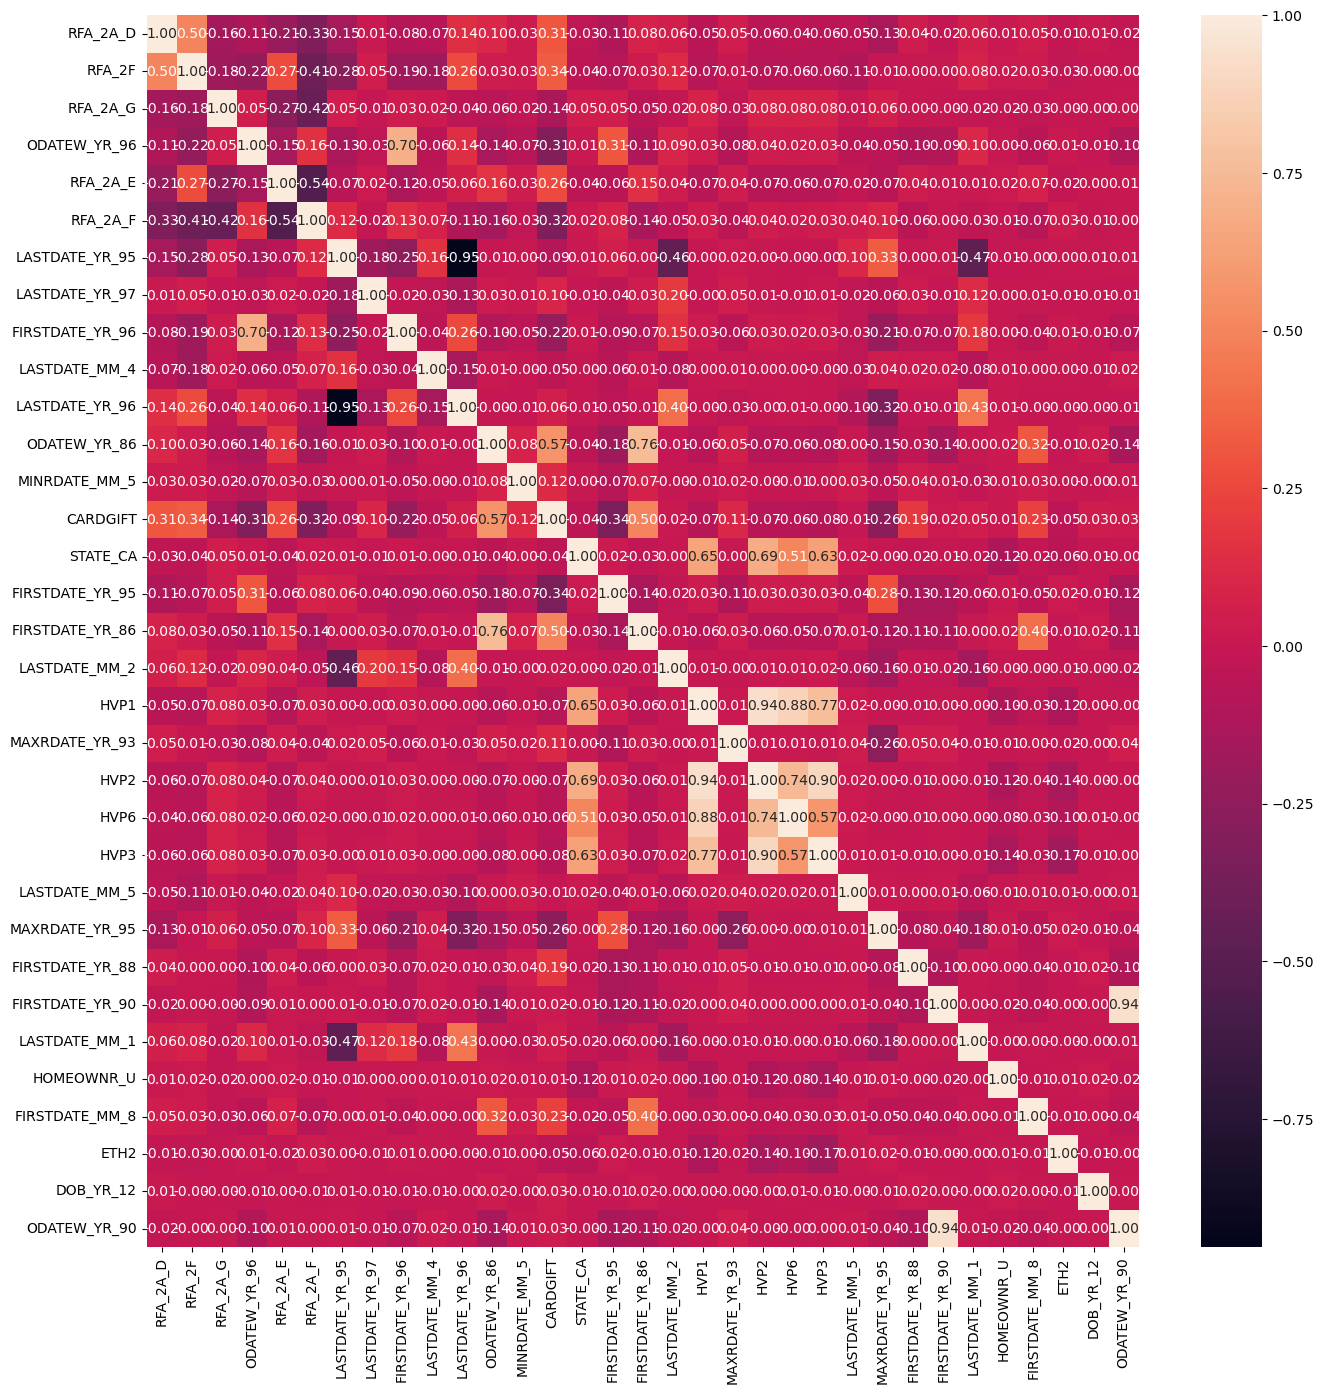

In [42]:
collist = corr_check(model,X_train_over, 33)

In [43]:
# The dataframe is really long.
# To eliminate multicollinearity, I would look for high correlation, 
# keep the first column(with the highest score) and eliminate those,
# with a too high correlation with it.
# I will try to put this into a function

In [44]:
def multicor_elim(df):
    '''
    Iterating over the whole dataframe and eliminating multicollinearity by hand is tedious and not very effective
    This function will iterate over the upper triangle of a correlation matrix and list the columns with a correlation
    over a given threshhold.
    '''
    droplist = []
    for row in range(len(df)):
        # If the selected columns already is part of the droplist, further colinearity is not importand and we don't want
        # to needlessly eliminate columns
        if df.columns[row] in droplist:
            pass
        
        # Since we iterate over the columns, starting with the row number, we just iterate over the upper triangle.
        for col in range(row,len(df.columns)): 
            # We skip the comparison if we are in the diagonal. Otherwise we would eliminate all columns.
            if row == col:
                 pass
            # We dont want to add columns multiple times
            elif df.columns[col] in droplist:
                pass
            # Finally we can check for multicollinearity
            
    

In [45]:
print(collist)

['RFA_2A_D', 'RFA_2F', 'RFA_2A_G', 'ODATEW_YR_96', 'RFA_2A_E', 'RFA_2A_F', 'LASTDATE_YR_95', 'LASTDATE_YR_97', 'FIRSTDATE_YR_96', 'LASTDATE_MM_4', 'LASTDATE_YR_96', 'ODATEW_YR_86', 'MINRDATE_MM_5', 'CARDGIFT', 'STATE_CA', 'FIRSTDATE_YR_95', 'FIRSTDATE_YR_86', 'LASTDATE_MM_2', 'HVP1', 'MAXRDATE_YR_93', 'HVP2', 'HVP6', 'HVP3', 'LASTDATE_MM_5', 'MAXRDATE_YR_95', 'FIRSTDATE_YR_88', 'FIRSTDATE_YR_90', 'LASTDATE_MM_1', 'HOMEOWNR_U', 'FIRSTDATE_MM_8', 'ETH2', 'DOB_YR_12', 'ODATEW_YR_90']


In [46]:
# Problematic columns to remove:
droplist = ['FIRSTDATE_YR_96','LASTDATE_YR_96','HVP1','FIRSTDATE_YR_86','HVP1','HVP3','HVP6','HVP4']

In [47]:
# We drop the columns
X_train_over = X_train_over.drop(droplist,axis=1)
# We have to do the same for the test data
X_test = X_test.drop(droplist,axis=1)

[[10980  7218]
 [  360   525]]
Profit: 2935.2599999999993 $
Logistic Regression score:  0.6028926269454489
Logistic Regressionprecision:  0.06780317706315382
Logistic Regressionrecall:  0.5932203389830508
Logistic Regressionf1:  0.12169680111265647
[[13054  5144]
 [  505   380]]
Profit: 2179.2799999999993 $
DecisionTree score:  0.7039773620499922
DecisionTreeprecision:  0.06879073135409124
DecisionTreerecall:  0.4293785310734463
DecisionTreef1:  0.11858324231549383
[[16615  1583]
 [  778   107]]
Profit: 522.1399999999999 $
KNN score:  0.8762773148875963
KNNprecision:  0.06331360946745562
KNNrecall:  0.12090395480225989
KNNf1:  0.08310679611650484
[[11035  7163]
 [  386   499]]
Profit: 2584.2199999999984 $
RandomForest score:  0.6044123041450505
RandomForestprecision:  0.06512659879926912
RandomForestrecall:  0.5638418079096045
RandomForestf1:  0.11676611676611677


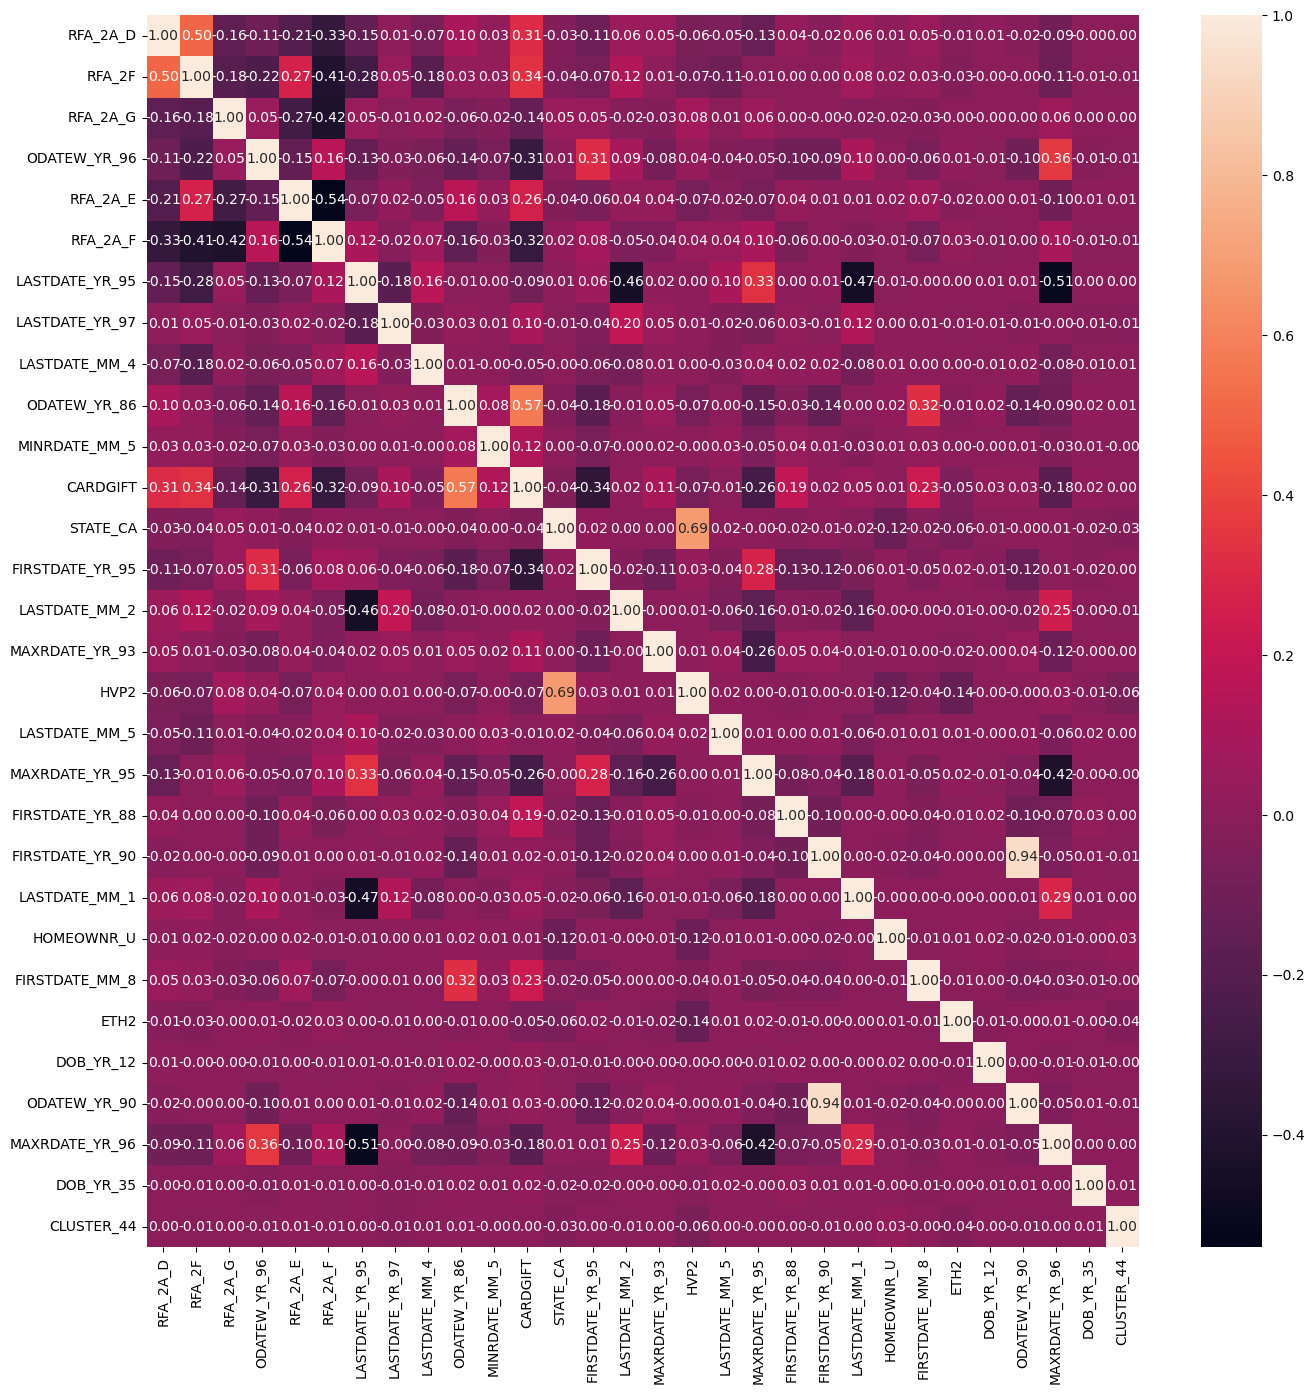

In [48]:
# Try again
model = SelectKBest(chi2, k=35).fit(X_train_over, y_train_over)
XTr_temp = pd.DataFrame(model.transform(X_train_over), index = X_train_over.index)
Xte_temp = pd.DataFrame(model.transform(X_test), index = X_test.index)
model_test(XTr_temp,Xte_temp,y_train_over, y_test)
collist = corr_check(model,X_train_over, 30)

In [49]:
# Problematic columns to remove:
droplist = ['STATE_CA','RP1']
# We drop the columns
X_train_over = X_train_over.drop(droplist,axis=1)
# We have to do the same for the test data
X_test = X_test.drop(droplist,axis=1)

[[10970  7228]
 [  377   508]]
Profit: 2674.4799999999996 $
Logistic Regression score:  0.6014777550699576
Logistic Regressionprecision:  0.0656670113753878
Logistic Regressionrecall:  0.5740112994350283
Logistic Regressionf1:  0.11785175733673588
[[13054  5144]
 [  505   380]]
Profit: 2179.2799999999993 $
DecisionTree score:  0.7039773620499922
DecisionTreeprecision:  0.06879073135409124
DecisionTreerecall:  0.4293785310734463
DecisionTreef1:  0.11858324231549383
[[16814  1384]
 [  797    88]]
Profit: 373.5999999999999 $
KNN score:  0.8857097940575381
KNNprecision:  0.059782608695652176
KNNrecall:  0.09943502824858758
KNNf1:  0.07467119219346628
[[11362  6836]
 [  409   476]]
Profit: 2462.959999999999 $
RandomForest score:  0.6203427134098413
RandomForestprecision:  0.0650984682713348
RandomForestrecall:  0.5378531073446328
RandomForestf1:  0.1161400512382579


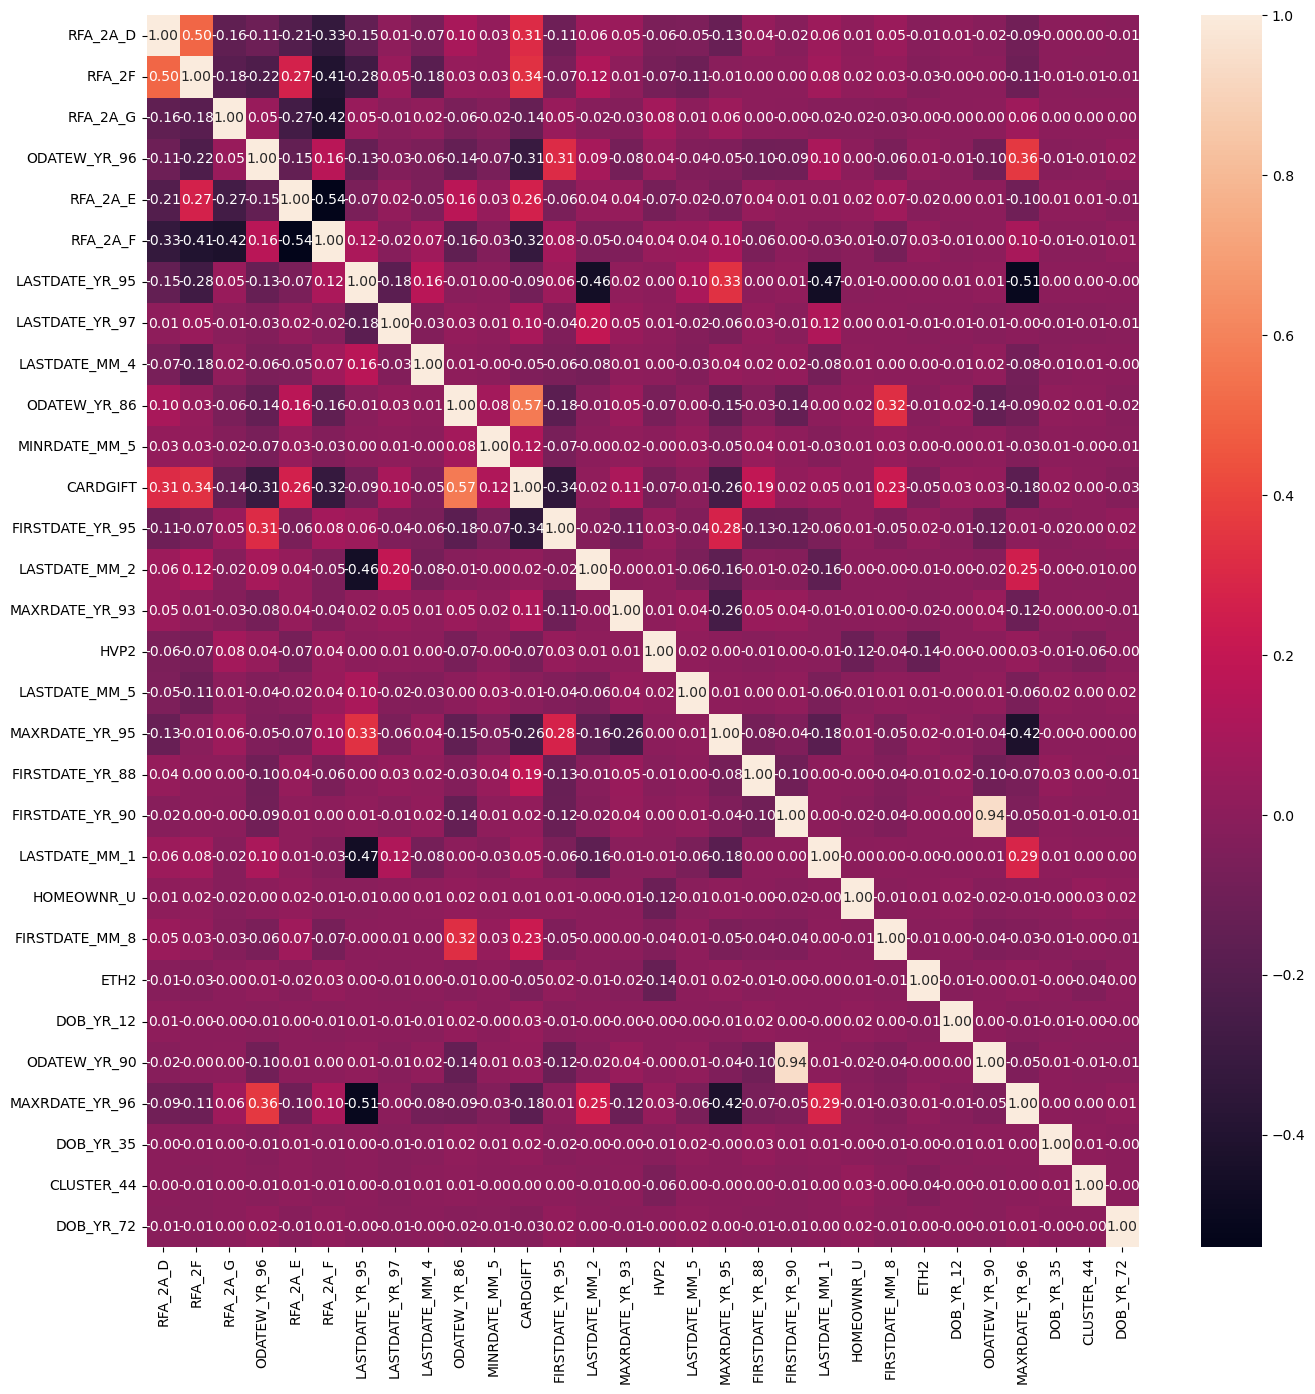

In [50]:
# Try again
model = SelectKBest(chi2, k=35).fit(X_train_over, y_train_over)
XTr_temp = pd.DataFrame(model.transform(X_train_over), index = X_train_over.index)
Xte_temp = pd.DataFrame(model.transform(X_test), index = X_test.index)
model_test(XTr_temp,Xte_temp,y_train_over, y_test)
collist = corr_check(model,X_train_over, 30)

In [51]:
# Problematic columns to remove:
droplist = ['ODATEW_YR_86','ODATEW_YR_88']
# We drop the columns
X_train_over = X_train_over.drop(droplist,axis=1)
# We have to do the same for the test data
X_test = X_test.drop(droplist,axis=1)

In [52]:
print(collist)

['RFA_2A_D', 'RFA_2F', 'RFA_2A_G', 'ODATEW_YR_96', 'RFA_2A_E', 'RFA_2A_F', 'LASTDATE_YR_95', 'LASTDATE_YR_97', 'LASTDATE_MM_4', 'ODATEW_YR_86', 'MINRDATE_MM_5', 'CARDGIFT', 'FIRSTDATE_YR_95', 'LASTDATE_MM_2', 'MAXRDATE_YR_93', 'HVP2', 'LASTDATE_MM_5', 'MAXRDATE_YR_95', 'FIRSTDATE_YR_88', 'FIRSTDATE_YR_90', 'LASTDATE_MM_1', 'HOMEOWNR_U', 'FIRSTDATE_MM_8', 'ETH2', 'DOB_YR_12', 'ODATEW_YR_90', 'MAXRDATE_YR_96', 'DOB_YR_35', 'CLUSTER_44', 'DOB_YR_72']


[[11004  7194]
 [  373   512]]
Profit: 2757.3599999999997 $
Logistic Regression score:  0.6034690562280564
Logistic Regressionprecision:  0.06644173371398909
Logistic Regressionrecall:  0.5785310734463277
Logistic Regressionf1:  0.11919450587824468
[[13054  5144]
 [  505   380]]
Profit: 2179.2799999999993 $
DecisionTree score:  0.7039773620499922
DecisionTreeprecision:  0.06879073135409124
DecisionTreerecall:  0.4293785310734463
DecisionTreef1:  0.11858324231549383
[[16783  1415]
 [  787    98]]
Profit: 501.91999999999985 $
KNN score:  0.8846093381543783
KNNprecision:  0.06477197620621282
KNNrecall:  0.11073446327683616
KNNf1:  0.08173477898248539
[[11308  6890]
 [  389   496]]
Profit: 2725.039999999999 $
RandomForest score:  0.6185610228999633
RandomForestprecision:  0.06715407527755213
RandomForestrecall:  0.56045197740113
RandomForestf1:  0.11993712973038327


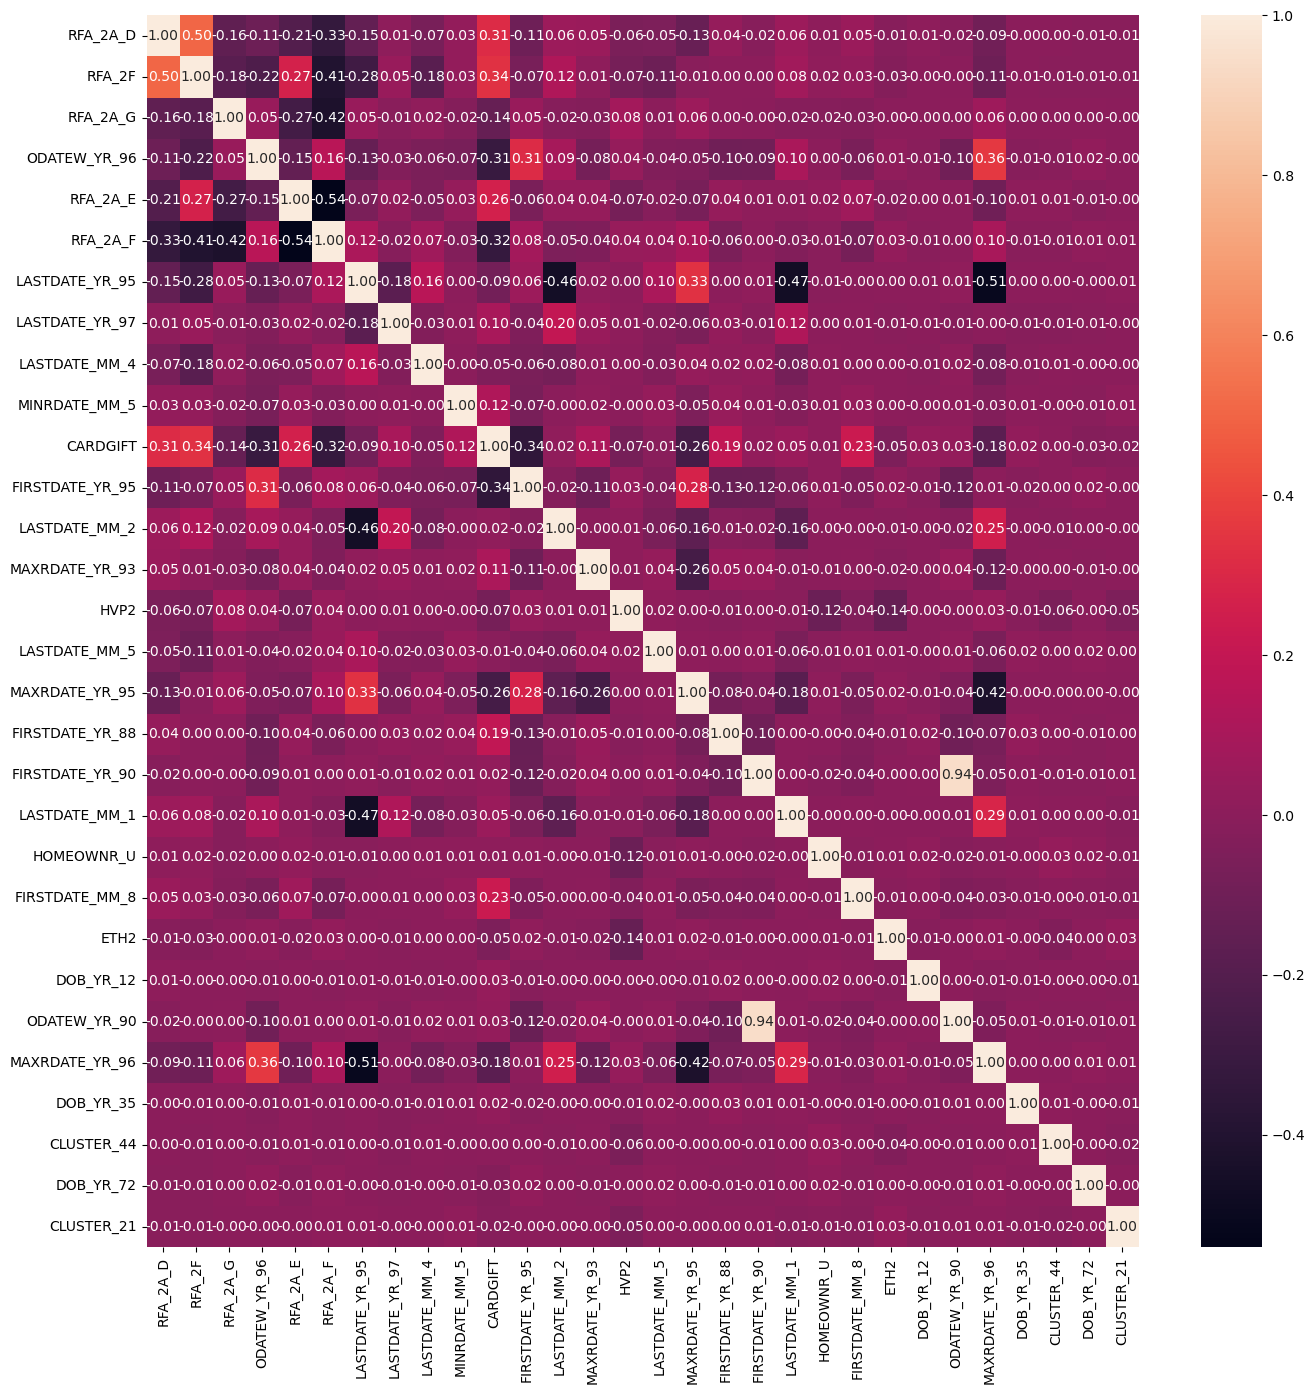

In [53]:
# Try again
model = SelectKBest(chi2, k=35).fit(X_train_over, y_train_over)
XTr_temp = pd.DataFrame(model.transform(X_train_over), index = X_train_over.index)
Xte_temp = pd.DataFrame(model.transform(X_test), index = X_test.index)
model_test(XTr_temp,Xte_temp,y_train_over, y_test)
collist = corr_check(model,X_train_over, 30)

As we can see, we have no more concerning multicollinearity in here and the amount of money our action would bring in got up quite a bit.

In [54]:
# These features look good, we will create a dataframe with jzust them and then move on:
X__train_selected = X_train_over[collist].copy()
X__test_selected = X_test[collist].copy()

# Model pipeline
We got the best results

In [55]:
from sklearn.model_selection import cross_validate

In [56]:
# Defining the different models
model1 = LogisticRegression(random_state=0, solver='sag')
model2 = DecisionTreeClassifier(max_depth=2)
model3 = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.2 )
model4 = neighbors.KNeighborsClassifier(n_neighbors=3, weights='distance')

In [57]:
# Iterating over each model, apllying it with cross validation and returning the results for comparison.
import warnings
warnings.filterwarnings('ignore')
model_pipeline = [model1, model2, model3, model4]
model_names = ['Logistic Regressor', 'Decision Tree', 'Random Forest', 'KNN Classifier']
scores = {}
for model, model_name in zip(model_pipeline, model_names):
    mean_score = np.mean(cross_val_score(model, X__test_selected, y_test, cv=10, scoring='recall'))
    scores[model_name] = mean_score
print(scores)

{'Logistic Regressor': 0.0, 'Decision Tree': 0.0, 'Random Forest': 0.0, 'KNN Classifier': 0.027017364657814097}


Well as we know this still looks bad, hopefully the hyperparameter search will yield better results.

# Hyperparameter search

#### Random search

In [58]:
from sklearn.model_selection import GridSearchCV

We try to improve our Random Forest model with Hyperparameter tuning, since we had the best results with the model.

In [59]:
# RandomForestClassifier(
#     n_estimators=100,
#     *,
#     criterion='gini',
#     max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='sqrt',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=None,
#     random_state=None,
#     verbose=0,
#     warm_start=False,
#     class_weight=None,
#     ccp_alpha=0.0,
#     max_samples=None,
# )

These are the possible parameters for the random forest, I will do some research and find useful values to get into the search.

In [60]:
# Defining what we want to try out
grid = {
            'max_depth': [5, 10, None],
            'min_samples_split' : [2,5,100],
            'n_jobs' : [-1],
            'max_features' : ['sqrt',30],
            'class_weight': [None,'balanced']
            }

In [61]:
# Choosing random forest
model = RandomForestClassifier()

In [62]:
X__test_selected.shape

(19083, 30)

In [63]:
# %%time
# grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 5, n_jobs = -1)
# grid_search.fit(X__test_selected, y_test)

In [64]:
# grid_search.best_params_

The grid search took quite long, so I put the results here:

In [65]:
rf = RandomForestClassifier(
 class_weight= None,
 criterion= 'gini',
 max_depth= 5,
 max_features= 'sqrt',
 min_samples_split= 2,
 n_jobs= -1
)

In [66]:
rf.fit(X__train_selected, y_train_over)
predictions = rf.predict(X__test_selected)
print(confusion_matrix(y_test, predictions))
print(moneycalc(confusion_matrix(y_test, predictions)))
print("Random Forest score: ", rf.score(X__test_selected, y_test))
print("Random Forest precision: ",precision_score(y_test,predictions))
print("Random Forest recall: ",recall_score(y_test,predictions))
print("Random Fores f1: ",f1_score(y_test,predictions))

[[11397  6801]
 [  401   484]]
2606.2799999999997
Random Forest score:  0.6225960278782162
Random Forest precision:  0.06643788606726149
Random Forest recall:  0.5468926553672316
Random Fores f1:  0.11848225214198285


We get a relatively good amount of money on this case.

# Additional tweaks

In [67]:
# I will try to improve the reults by altering the probability threshhold:

In [68]:
def probpred(probabilities, threshhold):
    predictions = []
    # We create our own predictions list, if the probability is bigger than the threshhold,
    # we set the value in our list.
    for p in probabilities:
        if p[1] >= threshhold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [69]:
predictions = probpred(rf.predict_proba(X__test_selected), .47)

In [70]:
cm = confusion_matrix(y_test, predictions)
print(cm)
print('Profit: '+str(moneycalc(cm))+ ' $')
print("Random Forest score: ", rf.score(X__test_selected, y_test))
print("Random Forest precision: ",precision_score(y_test,predictions))
print("Random Forest recall: ",recall_score(y_test,predictions))
print("Random Fores f1: ",f1_score(y_test,predictions))

[[8928 9270]
 [ 294  591]]
Profit: 2525.9399999999996 $
Random Forest score:  0.6225960278782162
Random Forest precision:  0.05993306966839063
Random Forest recall:  0.6677966101694915
Random Fores f1:  0.10999441652707985


I get the best value for how much money the mailing action would make if I lower the probability
threshhold to 47%

# Predictions for the dataset

#### Rebuilding the original dataframe, but already encoded

In [71]:
# Rebuilding the encoded dataframe
df_1 = pd.concat([train_encoded, train_num_scaled, y_train], axis = 1)
df_2 = pd.concat([test_encoded,test_num_scaled, y_test_all], axis = 1)
print(df_1.shape)
print(df_2.shape)

(76329, 648)
(19083, 648)


In [72]:
df = pd.concat([df_1,df_2], axis = 0)
print(df.shape)

(95412, 648)


#### Making predictions:

In [73]:
predictions = probpred(rf.predict_proba(df[collist]), .47)
df['Predicted_B'] = predictions

In [74]:
df.shape

(95412, 649)

#### Saving

In [76]:
# Takes quite some time, therefore commented out
# df.to_csv('encoded_predicted.csv', index=False)

# Conclusion

In [77]:
# Cost for all mailings:
Cost = len(df[df['Predicted_B']==1])*0.68
Cost

33509.04

In [78]:
# Revenue
Revenue = len( df[ (df['Predicted_B']==1) & (df['TARGET_B']==1)] ) * 15.62
Revenue 

52030.219999999994

In [79]:
Revenue - Cost

18521.179999999993

Following the predictions the profit on our mailing action would be 18521 USD, 
this is already a substantial improvement in comparison to the about 11000 USD from before.